In [1]:
from numpy.random import seed
seed(4)

In [2]:
import os
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
training_data_path = os.path.join('sentimentsamp.xls')
comp_data_path = os.path.join('complete_merged_dataset.csv')

alltrainingdata_df = pd.read_excel(training_data_path)
allcompdata_df = pd.read_csv(comp_data_path)

alltrainingdata_df.head()

,id,sentiment,sentence,ticker,call_title,speaker,call_section
0,1,3,All participants will be in a listen-only mode.,CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 201...",Operator,operator_instruction
1,3,3,[Operator Instructions] Please note this event...,CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 201...",Operator,operator_instruction
2,4,3,I would now like to turn the conference over t...,CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 201...",Operator,operator_instruction
3,5,3,Please go ahead.,CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 201...",Operator,operator_instruction
4,6,3,"Hello, everyone, and welcome to our third qua...",CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 201...",Ashish Kohli,presentation


In [4]:
# shift sentiment scores down by 1 to establish a 0-based scale. this makes the 'to_categorical' call cleaner
y_train_df = pd.DataFrame(alltrainingdata_df['sentiment'] - 1)

y_train_categorical = to_categorical(y_train_df)

y_train_categorical[:10]

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [5]:
# preview the one-hot target values
temp = pd.DataFrame(y_train_categorical)
temp.describe()

,0,1,2,3,4
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.023667,0.102000,0.629333,0.212667,0.032333
std,0.152034,0.302699,0.483064,0.409262,0.176913
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X_train_df = pd.DataFrame(alltrainingdata_df['sentence'])
X_comp_df = pd.DataFrame(allcompdata_df['sentence'])

X_comp_df.head()

,sentence
0,Good morning and welcome to the Dominion Ener...
1,"At this time, each of your lines is in a liste..."
2,"At the conclusion of today’s presentation, we ..."
3,[Operator Instructions] I would now like to tu...
4,Good morning and welcome.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_categorical, test_size=0.25,random_state=109)

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(X_train['sentence'])]

In [9]:
max_epochs = 100
vec_size = 100  #20
alpha = 0.025
model2 = Doc2Vec(size=vec_size,
               alpha=alpha,
               min_alpha=0.0025,
               min_count=1,
               dm =0)
model2.build_vocab(tagged_data)
for epoch in range(max_epochs):
   print('iteration {0}'.format(epoch))
   model2.train(tagged_data,
               total_examples=model2.corpus_count,
               epochs=model2.iter)
   # decrease the learning rate
   model2.alpha -= 0.002
   # fix the learning rate, no decay
   model2.min_alpha = model2.alpha
model2.save('d2v.model')
print('Model Saved')
    
    

/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [10]:
vectored_list = []
for row in X_train['sentence']:
    word_vec = word_tokenize(row.lower())
    sent_vec = model2.infer_vector(word_vec)
    vectored_list.append(sent_vec)

vectored_test = []
for row in X_test['sentence']:
    word_vec = word_tokenize(row.lower())
    sent_vec = model2.infer_vector(word_vec)
    vectored_test.append(sent_vec)

complete_list = []
for row in X_comp_df['sentence']:
    word_vec = word_tokenize(row.lower())
    sent_vec = model2.infer_vector(word_vec)
    complete_list.append(sent_vec)
complete_list

[array([ 0.41390368,  0.18276903,  0.03092296,  0.24442154, -0.02142383,
         0.25199142, -0.21230349, -0.23616517, -0.46531576, -0.24795574,
         0.08598655,  0.23683088,  0.1640958 , -0.00069396,  0.14926758,
         0.30158854,  0.17612725,  0.10014331,  0.08795231, -0.06285208,
        -0.46097475, -0.08332002,  0.13677685,  0.07759526, -0.09540385,
         0.17054741, -0.13609299, -0.05258294, -0.11917032,  0.30142716,
         0.07074289, -0.0099821 , -0.1988993 , -0.22729112, -0.14844486,
         0.0382638 ,  0.03205074, -0.15709358, -0.42222908,  0.38204798,
         0.10756897,  0.15229394, -0.04128331,  0.09230483, -0.24398635,
        -0.4037566 ,  0.08826901,  0.24620652, -0.19735266,  0.01209629,
         0.29181394, -0.20594868,  0.1581289 ,  0.18675943,  0.04394916,
         0.19756138, -0.47947794, -0.12985367,  0.04036349, -0.0300162 ,
        -0.16955693,  0.3135691 , -0.2535591 ,  0.65772223, -0.5016478 ,
         0.11652218,  0.13174222,  0.13113268,  0.4

In [11]:
vectored_list = np.array(vectored_list)
new_vectored_list = vectored_list[:2250]

vectored_test = np.array(vectored_test)
new_vectored_test = vectored_test[:750]

complete_list = np.array(complete_list)
new_complete = complete_list#[:42940]

print(new_vectored_list.shape, new_vectored_test.shape, new_complete.shape)

(2250, 100) (750, 100) (42941, 100)


In [12]:
model = Sequential()
number_inputs = 100
number_hidden_nodes = 125
model.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))
model.add(Dropout(0.1))
model.add(Dense(units=number_hidden_nodes / 5, activation='relu'))
model.add(Dense(units=number_hidden_nodes, activation='relu'))

number_classes = 5
model.add(Dense(units=number_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 125)               12625     
_________________________________________________________________
dropout (Dropout)            (None, 125)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                3150      
_________________________________________________________________
dense_2 (Dense)              (None, 125)               3250      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 630       
Total params: 19,655
Trainable params: 19,655
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(new_vectored_list, y_train, epochs=50, shuffle=True, verbose=2)

Train on 2250 samples
Epoch 1/50
2250/2250 - 1s - loss: 1.1383 - accuracy: 0.6178
Epoch 2/50
2250/2250 - 0s - loss: 1.0717 - accuracy: 0.6187
Epoch 3/50
2250/2250 - 0s - loss: 1.0539 - accuracy: 0.6187
Epoch 4/50
2250/2250 - 0s - loss: 1.0434 - accuracy: 0.6182
Epoch 5/50
2250/2250 - 0s - loss: 1.0446 - accuracy: 0.6187
Epoch 6/50
2250/2250 - 0s - loss: 1.0323 - accuracy: 0.6187
Epoch 7/50
2250/2250 - 0s - loss: 1.0302 - accuracy: 0.6160
Epoch 8/50
2250/2250 - 0s - loss: 1.0249 - accuracy: 0.6187
Epoch 9/50
2250/2250 - 0s - loss: 1.0205 - accuracy: 0.6182
Epoch 10/50
2250/2250 - 0s - loss: 1.0176 - accuracy: 0.6182
Epoch 11/50
2250/2250 - 0s - loss: 1.0132 - accuracy: 0.6178
Epoch 12/50
2250/2250 - 0s - loss: 1.0034 - accuracy: 0.6191
Epoch 13/50
2250/2250 - 0s - loss: 0.9971 - accuracy: 0.6218
Epoch 14/50
2250/2250 - 0s - loss: 0.9955 - accuracy: 0.6222
Epoch 15/50
2250/2250 - 0s - loss: 0.9895 - accuracy: 0.6191
Epoch 16/50
2250/2250 - 0s - loss: 0.9887 - accuracy: 0.6222
Epoch 17/50

In [14]:
model_loss, model_accuracy = model.evaluate(new_vectored_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

750/1 - 0s - loss: 0.8883 - accuracy: 0.6160
Loss: 1.2610054806073507, Accuracy: 0.6159999966621399


In [39]:
model_results = model.predict_classes(new_complete)
model_prob_results = model.predict(new_complete)
df_model_prob_results = pd.DataFrame(model_prob_results)
df_model_prob_results.columns = ['prob_1','prob_2','prob_3','prob_4','prob_5']
df_model_prob_results.head()

,prob_1,prob_2,prob_3,prob_4,prob_5
0,0.004606,0.093423,0.601783,0.295546,0.004643
1,0.005961,0.106496,0.490910,0.266511,0.130122
2,0.000094,0.001007,0.966405,0.001552,0.030943
3,0.003702,0.397657,0.356262,0.238194,0.004186
4,0.018390,0.096235,0.875084,0.004576,0.005715


In [ ]:
# output data
allcompdata_df.to_csv('../db/final_complete_merged_dataset.csv', sep='|')

In [40]:
prob_compdata_df = pd.concat([allcompdata_df,df_model_probresults], axis=1)
prob_compdata_df.head()

,Unnamed: 0,call_datetime,Unnamed: 0_x,id,sentiment,sentence,ticker,call_title,speaker,call_section,...,prob_1,prob_2,prob_3,prob_4,prob_5,prob_1,prob_2,prob_3,prob_4,prob_5
0,0,2019-11-01 10:00:00,457,457,NaN,Good morning and welcome to the Dominion Ener...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,0.004606,0.093423,0.601783,0.295546,0.004643,0.004606,0.093423,0.601783,0.295546,0.004643
1,1,2019-11-01 10:00:00,458,458,NaN,"At this time, each of your lines is in a liste...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,0.005961,0.106496,0.490910,0.266511,0.130122,0.005961,0.106496,0.490910,0.266511,0.130122
2,2,2019-11-01 10:00:00,459,459,NaN,"At the conclusion of today’s presentation, we ...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,0.000094,0.001007,0.966405,0.001552,0.030943,0.000094,0.001007,0.966405,0.001552,0.030943
3,3,2019-11-01 10:00:00,460,460,NaN,[Operator Instructions] I would now like to tu...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,0.003702,0.397657,0.356262,0.238194,0.004186,0.003702,0.397657,0.356262,0.238194,0.004186
4,4,2019-11-01 10:00:00,461,461,NaN,Good morning and welcome.,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,presentation,...,0.018390,0.096235,0.875084,0.004576,0.005715,0.018390,0.096235,0.875084,0.004576,0.005715


In [37]:
allcompdata_df.describe()

,Unnamed: 0,Unnamed: 0_x,id,sentiment,vader_sentiment,base_close,base_volume,next_close,next_volume,marketCap,percent_change_price,percent_change_volume,prob_1,prob_2,prob_3,prob_4,prob_5
count,42941.000000,42941.000000,42941.000000,0.0,42941.000000,42941.000000,4.294100e+04,42941.000000,4.294100e+04,4.294100e+04,42941.000000,42941.000000,4.294100e+04,42941.000000,42941.000000,42941.000000,4.294100e+04
mean,23556.465895,18447.076407,18447.076407,NaN,0.259800,143.517541,6.102612e+06,139.942650,1.319834e+07,5.101830e+10,-0.341603,98.786692,3.101576e-02,0.091547,0.645812,0.208247,2.337877e-02
std,16081.709925,12520.269232,12520.269232,NaN,0.330205,265.461199,1.140393e+07,246.591195,2.933328e+07,6.092187e+10,5.707717,127.013049,6.433447e-02,0.101927,0.225621,0.176840,4.409765e-02
min,0.000000,0.000000,0.000000,NaN,-0.949300,9.070000,2.280000e+05,10.110000,4.135000e+05,5.205218e+09,-20.808657,-30.405860,1.280586e-38,0.000000,0.000060,0.000000,3.694907e-26
25%,10735.000000,6440.000000,6440.000000,NaN,0.000000,42.650002,1.473700e+06,43.680000,2.355400e+06,1.279713e+10,-3.140449,30.741410,6.691983e-04,0.016925,0.488184,0.063575,2.928690e-03
50%,21470.000000,17778.000000,17778.000000,NaN,0.273200,82.730003,2.525500e+06,84.559998,4.400500e+06,2.386513e+10,0.439476,65.650464,8.669156e-03,0.069939,0.622841,0.193133,1.103562e-02
75%,32205.000000,29037.000000,29037.000000,NaN,0.493900,141.029999,6.106800e+06,138.119995,1.070740e+07,5.688201e+10,2.937574,124.076569,3.216803e-02,0.125641,0.822480,0.302156,2.743177e-02
max,64976.000000,40712.000000,40712.000000,NaN,0.993000,2012.089966,7.865600e+07,1849.930054,2.159434e+08,2.962090e+11,13.692753,771.327086,9.545830e-01,0.997667,1.000000,0.999922,9.813496e-01


In [18]:
allcompdata_df['model_results'] = allcompdata_df['model_results'] + 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136f48668>]],
      dtype=object)

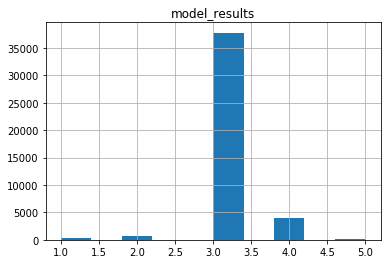

In [20]:
import pylab as pl
allcompdata_df.hist(column='model_results')

In [21]:
allcompdata_df['model_results'].value_counts()

3    37791
4     3932
2      764
1      349
5      105
Name: model_results, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139007a20>]],
      dtype=object)

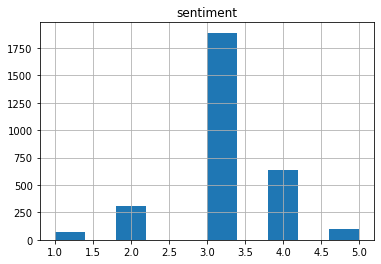

In [22]:
alltrainingdata_df.hist(column='sentiment')

In [23]:
alltrainingdata_df['sentiment'].value_counts()

3    1888
4     638
2     306
5      97
1      71
Name: sentiment, dtype: int64

In [24]:
df_sentiment_dist = pd.DataFrame({
    'Training Data': alltrainingdata_df['sentiment'].value_counts(),
    'Prediction Results': allcompdata_df['model_results'].value_counts()
})

df_sentiment_dist

,Training Data,Prediction Results
1,71,349
2,306,764
3,1888,37791
4,638,3932
5,97,105


In [27]:
# The statistical module used to run chi square test
import scipy.stats as stats

# The degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

print(f'Chi-Square Critical Value: {critical_value}')

# Run the chi square test with stats.chisquare()
stats.chisquare(df_sentiment_dist['Prediction Results'], df_sentiment_dist['Training Data'], )

Chi-Square Critical Value: 9.487729036781154


Power_divergenceResult(statistic=701528.1320863354, pvalue=0.0)

### Conclusion

* Since the chi square value of 701,528 exceeds the critical value of 9.49, we conclude that the results are statistically significant and **there is a difference between the data sets**.  This is not desirable in this case.

### Try Kmeans clustering (unsupervised)

In [ ]:
from sklearn.cluster import KMeans

# no need to use training data since it is unsupervised
kmeans = KMeans(n_clusters=5).fit(new_complete)


In [ ]:
k_pred = kmeans.predict(new_complete)

np.bincount(k_pred)

In [ ]:
# add kmeans cluster to dataframe
allcompdata_df['kmeans_cluster'] = k_pred
allcompdata_df.head()

In [ ]:
# output data
allcompdata_df.to_csv('../db/final_complete_merged_dataset.csv', sep='|')

### chi-square
find chi-square beteen original sentiment score vs. predicted score

seqeuntial probability ratio test